**Predicting Maternal Health Risk Levels using Machine Learning**

**Overview -**
Maternal health is crucial for both mothers and their newborns. Identifying mothers who might be at risk early on can save lives. In this project, I used machine learning techniques to predict maternal health risk levels—categorized as High, Mid, or Low Risk—by analyzing common health indicators such as age, blood pressure, blood sugar, body temperature, and heart rate.

**Problem -**
Current methods for identifying maternal health risks often rely heavily on subjective assessments, which can delay accurate diagnosis.

**Solution -** 
I built machine learning models (Random Forest and XGBoost) to automatically and accurately classify maternal health risks, making more easy for healthcare providers and gynecologists.

**Dataset Selection**
- I chose a dataset from the UCI Machine Learning repository about maternal health risk.
- This dataset includes 1014 records with 6 features.
- The dataset contains no null values and size is 7098.
- The target variable is **RiskLevel**, which consists of High, Mid, and Low risk levels.
- The problem type is Classification.
- Feature Details:
    - **Age**: Age in years when a woman is pregnant.
    - **SystolicBP**: Upper value of Blood Pressure in mmHg.
    - **DiastolicBP**: Lower value of Blood Pressure in mmHg.
    - **BS**: Blood glucose levels in terms of a molar concentration (mmol/L).
    - **HeartRate**: A normal resting heart rate in beats per minute.
    - **BodyTemp:** Body temperature 
    - **Risk Level**: Predicted Risk Intensity Level during pregnancy, considering all attributes.

In [92]:
import pandas as pd

In [93]:
data = pd.read_csv("Maternal Health Risk Data Set.csv")

In [94]:
data.head(6)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk


In [95]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

**Handling Data Issues:**

- First, we checked the shape of the dataset using 'data.shape', which showed **(1014, 7)**, meaning there are **1014 rows and 7 columns**.
- We then identified potential data issues by filtering out rows where 'HeartRate' was **less than 55** 

In [96]:
data.shape

(1014, 7)

In [97]:
data[data.HeartRate < 55]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


In [98]:
data["HeartRate"].replace(7, 70, inplace=True)

C:\Users\tasmi\AppData\Local\Temp\ipykernel_3184\2058949410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["HeartRate"].replace(7, 70, inplace=True)


In [99]:
data[data.HeartRate < 50]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


- This returned 2 rows where the HeartRate value was incorrectly recorded as 7.
- A normal resting heart rate is typically between 60 and 100 bpm so corrected that initially

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


- No missing values (All 1014 rows contain data for every column).
- RiskLevel is an object (categorical text), which is encoded later in the code.
- All other features are numerical (int64 or float64)

In [101]:
data.size

7098

In [102]:
unique_levels = data['RiskLevel'].unique()
print("Unique Levels in 'RiskLevel':", unique_levels)

Unique Levels in 'RiskLevel': ['high risk' 'low risk' 'mid risk']


- The 'RiskLevel' column contains three unique categories:**high risk**, **low risk**, **mid risk**

In [103]:
missing_values = data.isnull().sum()
print(missing_values)

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


#### **Data Visualization**

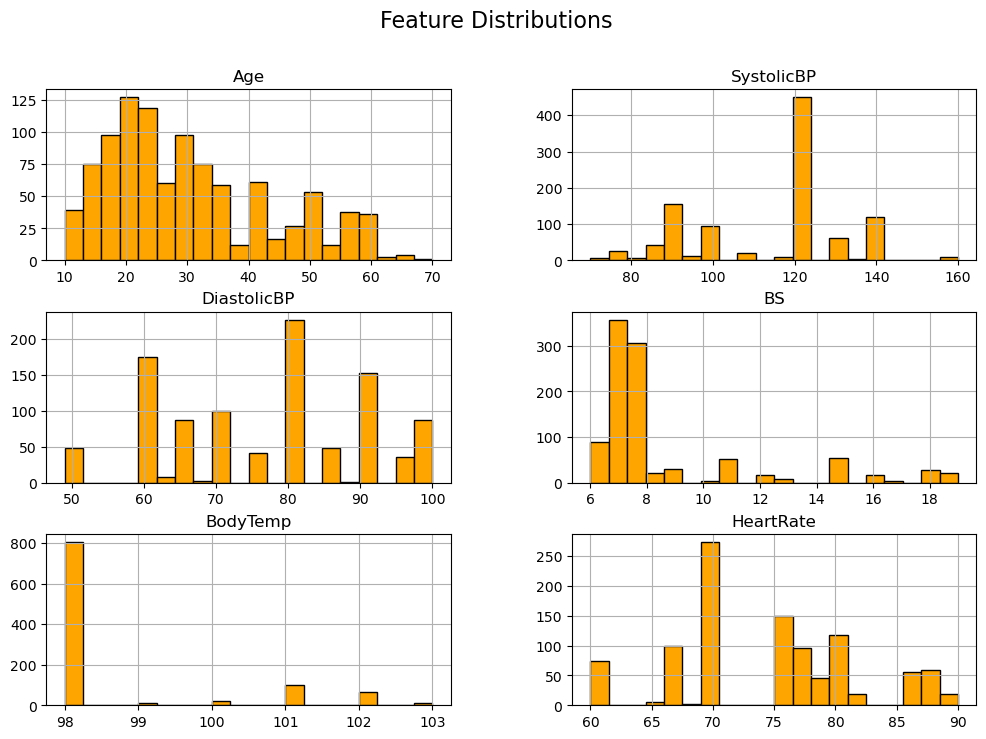

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

data.hist(figsize=(12, 8), bins=20,color='orange',edgecolor = 'black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

**Feature Distributions Analysis**

**Key Observations:**
- **Age:** Most pregnant women are between **20-40 years old**, clear peak at 20-30 range.
- **SystolicBP (Upper BP):** Peaks around **120 mmHg**, which is normal.
- **DiastolicBP (Lower BP):** Mostly between **60-80 mmHg**, showing some major variation.
- **BS (Blood Sugar):** Common values range from **6-8 mmol/L**, but some are higher.
- **BodyTemp:** Nearly all values are around **98-99°C**, relatively normal.
- **HeartRate:** Mostly falls between **70-80 BPM**, but a few higher readings exist.

**Insights for later**
- The dataset appears **well-distributed**, but some features have clear peaks.
- Scaling is **important** since some features (e.g., blood pressure) have a wider range than others.


Text(0.5, 1.0, 'Heart Rate by Risk Level')

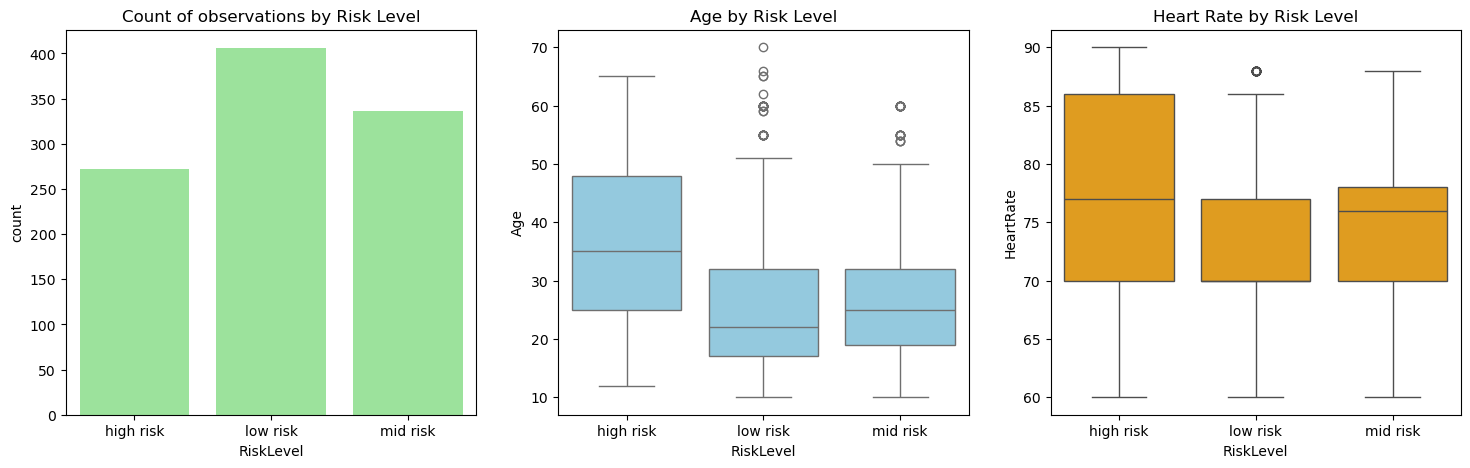

In [105]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(18,5))         #making 3 subplots horizontally with 1row, 3 columns

sns.countplot(ax=axes[0], x=data['RiskLevel'], color='lightgreen')
axes[0].set_title("Count of observations by Risk Level")         #ax=axes[0] indicates first subplot

sns.boxplot(ax=axes[1], x=data['RiskLevel'], y=data['Age'], color = 'skyblue')      #grouping the data by 'RiskLevel', ploting 'Age' in y axis
axes[1].set_title("Age by Risk Level")

sns.boxplot(ax=axes[2], x=data['RiskLevel'], y=data['HeartRate'], color='orange')   #showing 'HeartRate' distribution across 'RiskLevel'
axes[2].set_title("Heart Rate by Risk Level")

**Risk Level Analysis**

**1. Count of Observations by Risk Level**
- **Low risk** has the highest number of cases, followed by **mid risk**, while **high risk** has the fewest.
- This indicates an **imbalance in the dataset**, which might impact model training.

**2️. Age Distribution by Risk Level**
- Higher age is linked to a higher pregnancy risk.(26-48) age group.
- Low-risk pregnancies are more common in younger individuals, seems more safe for age 17-32.

**3️. Heart Rate Distribution by Risk Level**
- Higher heart rates are associated with high-risk pregnancies.
- Mid-risk cases have a relatively stable heart rate distribution.

**Finding out numerical columns dynamically in our dataset**

In [106]:
# Selecting columns where our data type is integer or float & converting those columns into a list
numerical_cols = data.select_dtypes(include=['number']).columns.to_list()
print('Numerical Features:', numerical_cols)

Numerical Features: ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']


We don't have 'RiskLevel' here as that is our target column(categorical value); not feature. 

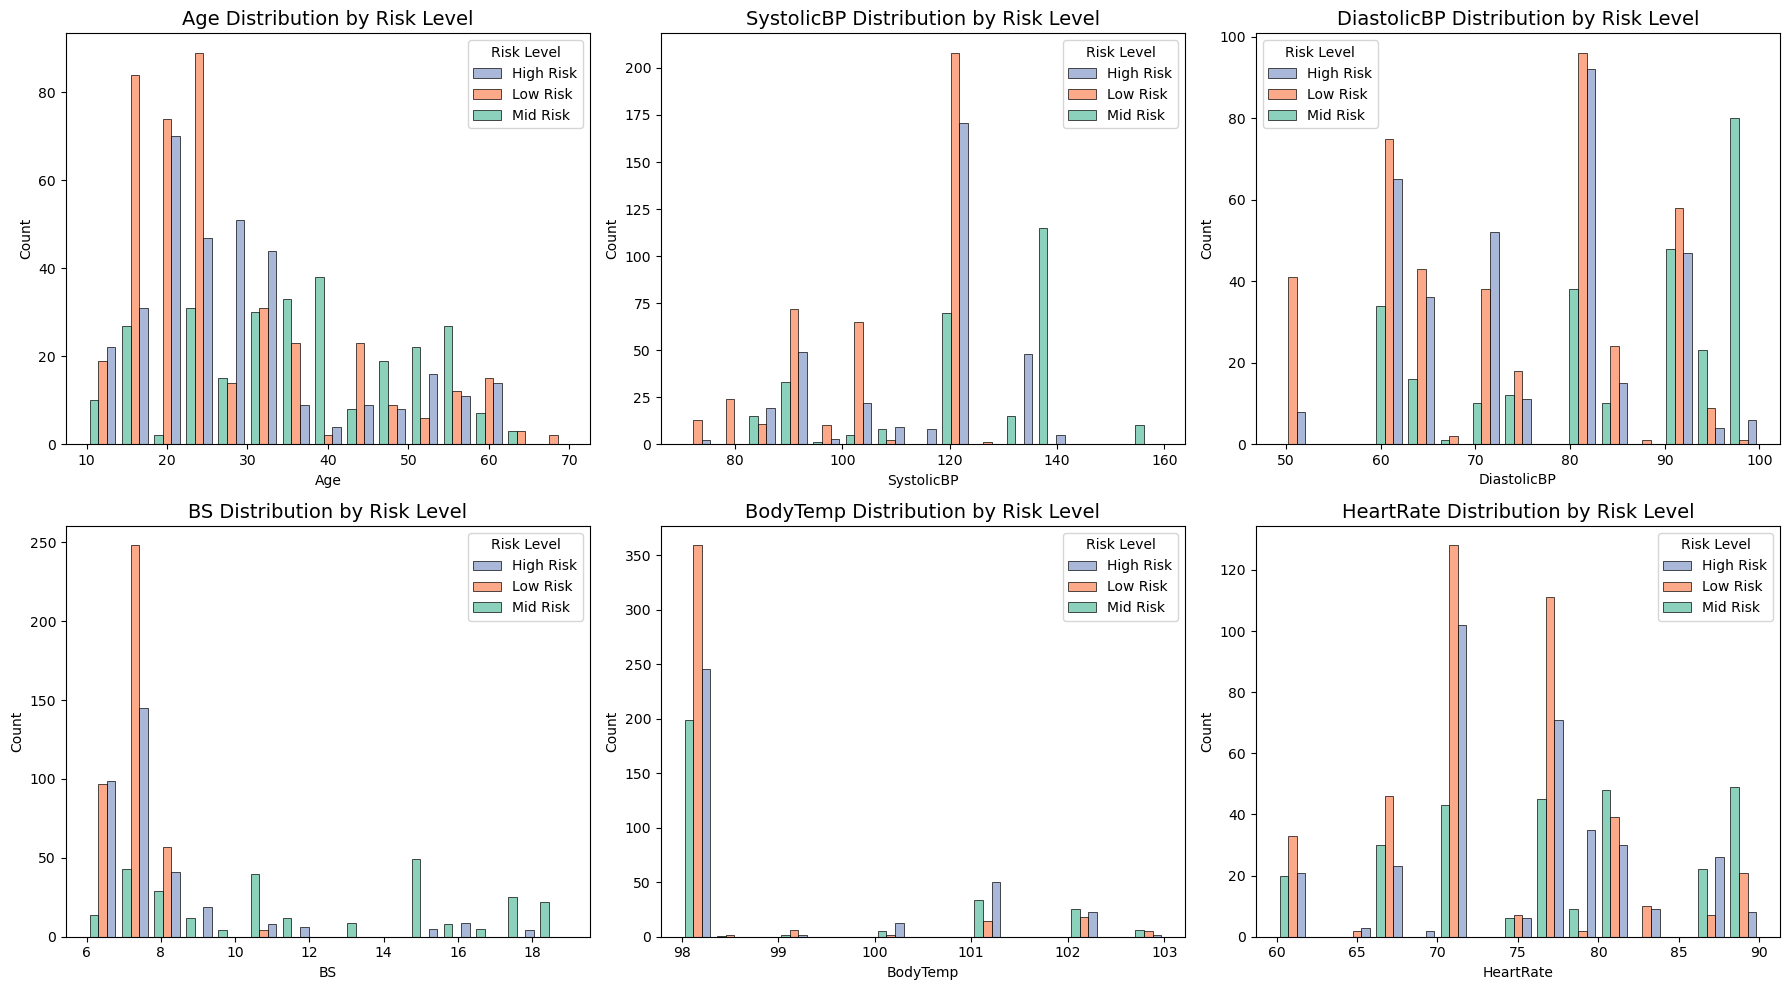

In [107]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))   #creating 2 rows,3 columns => total 6 subplots
axes = axes.flatten()

#will loop for each numerical value in the dataset
for i, col in enumerate(numerical_cols):           #i=index(subplot position), col=feature name
    sns.histplot(data, x=col, hue='RiskLevel', bins=15, multiple='dodge', shrink=0.8, palette='Set2', ax=axes[i])
    #x axis will have feature name, hue sets color bars for risk levels
    axes[i].set_title(f"{col} Distribution by Risk Level", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Risk Level', labels= ['High Risk', 'Low Risk', 'Mid Risk'])

plt.tight_layout()    #to avoid overlapping between RiskLevel
plt.show()

**Feature Distributions by Risk Level**  
- Age: Younger individuals are mostly in the low-risk group, while older ones are more in high risk.  
- Blood Pressure (Systolic & Diastolic): Higher values are linked to mid and high risk.  
- Blood Sugar (BS): Low-risk cases have lower values, while mid and high risk show more variation.  
- Body Temperature: Most values are around 98°F, with little difference across risk levels.  
- Heart Rate: Varies more in high-risk cases, while low risk is more stable.  


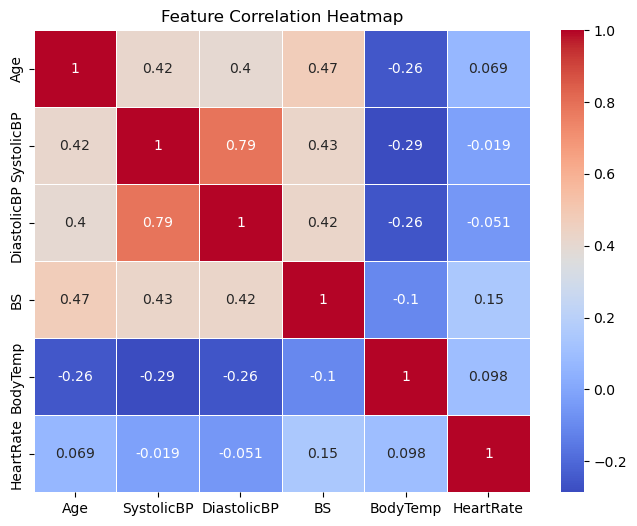

In [108]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

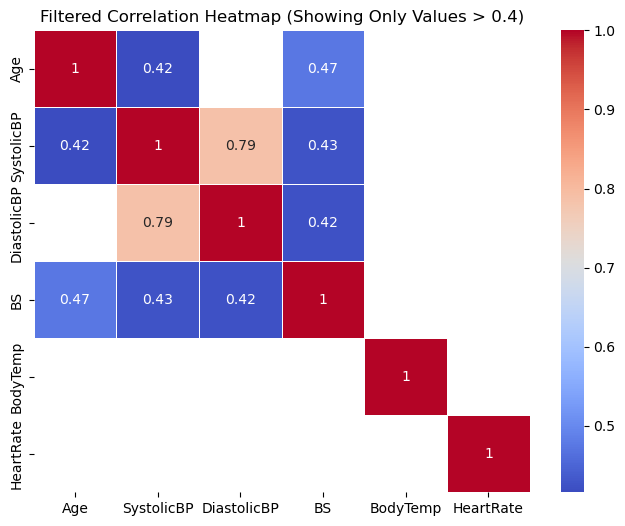

In [109]:
import numpy as np
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(8, 6))
                                        #creating this mask to see strong correlation within a glance
mask = np.abs(corr_matrix) < 0.4        #with np.abs; only taking positive values & with condition:values bigger than 0.4
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, linewidths=0.5)

plt.title("Filtered Correlation Heatmap (Showing Only Values > 0.4)") 
plt.show()

**Correlation Heatmap Analysis**

- **SystolicBP & DiastolicBP (0.79 correlation)**  
  - Strong correlation, indicating possible redundancy.  
  - Dropping one could simplify the model, but since we have only six features, I kept it.  
  - Removing **DiastolicBP** significantly lowered **Random Forest's** performance.

- BS (Blood Sugar) has moderate correlation (0.42 - 0.47) with Age, SystolicBP, and DiastolicBP 

- Dropping highly correlated features is usually preferred, but in our case, keeping all features performed better.
- Keeping all features resulted in better performance for both **Random Forest** and **XGBoost**.

#### **Data Preprocessing**

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [111]:
print("Before encoding 'RiskLevel'(target value & categorical feature):\n",data['RiskLevel'])

Before encoding 'RiskLevel'(target value & categorical feature):
 0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object


**Encoding Categorical Variable(We have only one in our dataset)**

In [ ]:
encoder = LabelEncoder()                                          #creating instance of LabelEncoder() to convert categorical labels into numerical values. 
data['RiskLevel'] = encoder.fit_transform(data['RiskLevel'])      #transform(): each category => a unique numeric label.
print("'RiskLevel' encoded successfully!")
print("After encoding 'RiskLevel'(target value & categorical feature)\n",data['RiskLevel'])   

'RiskLevel' encoded successfully!
After encoding 'RiskLevel'(target value & categorical feature)
 0       0
1       0
2       0
3       0
4       1
       ..
1009    0
1010    0
1011    0
1012    0
1013    2
Name: RiskLevel, Length: 1014, dtype: int32


Now, Output represents: high risk => 0, low risk => 1, mid risk => 2

**Train-validation the dataset(80_training/20_validation)**

In [ ]:
X = data.drop(columns=['RiskLevel'])   #Dropping target column from X(features)
y = data['RiskLevel']                  #Keeping 'RiskLevel' in target value, dependent variable.

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
                                       #test_size=0.2 : 20% =>Validation set; 80% =>Training set, stratify=y : preventing imbalanced split

print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")
print(f"X_val Shape: {X_val.shape}, y_val Shape: {y_val.shape}")

X_train Shape: (811, 6), y_train Shape: (811,)
X_val Shape: (203, 6), y_val Shape: (203,)


- 811 samples are used for training.  
- 203 samples are used for validation.  
- 6 features (excluding RiskLevel) are used.

#### **Feature Scaling(StandardScaler)**

In [114]:
print("Before scaling:\n",X_train.head(6))

Before scaling:
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
992   17         110           75  13.0     101.0         76
883   35         120           60   6.1      98.0         76
251   12          95           60   6.9      98.0         65
294   29         130           70   7.7      98.0         78
756   23         130           70   6.9      98.0         70
582   19         120           76   7.5      98.0         66


In [115]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)    #fitting training data & transforming values
X_val_scaled = scaler.transform(X_val)            #transforming validation data

In [116]:
#Converting X_train_scaled into a dataFrame with correct column names => X_train
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)          #X_train_scaled is a Numpy array
X_val = pd.DataFrame(X_val_scaled, columns=X.columns)
print('Feature Scaling is done here.')
print(X_train.head())

Feature Scaling is done here.
        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
0 -0.955493   -0.163860    -0.098968  1.292816  1.671023   0.195731
1  0.380806    0.371557    -1.173914 -0.798682 -0.492680   0.195731
2 -1.326687   -0.966986    -1.173914 -0.556189 -0.492680  -1.258153
3 -0.064627    0.906974    -0.457283 -0.313697 -0.492680   0.460073
4 -0.510060    0.906974    -0.457283 -0.556189 -0.492680  -0.597297


After scaling, the numerical values are standardized:

- The mean is 0, and the standard deviation is 1 for each feature.
- All feature values are transformed into a normalized range.
- Each value represents how many standard deviations it is away from the mean.

**Example:**
- Before Scaling: Age = 17, 35, 12  
- After Scaling: Age = -0.95, 0.38, -1.32 (values are adjusted relative to the mean)


#### **Model Selection**

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

I chosed KNN,Decision Tree, SVM, Random Forest, XGBoost for training purpose.

In [118]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier()
}

Evaluating Models

In [ ]:
cv_folds = 5                                #cross-validation folds to 5(splitting dataset into 5 parts)
model_results = []                          #empty list to store evaluation results

for model_name, model in models.items():    #looping for each model in model dictionary
    scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy', n_jobs=-1)   #evaluation metric is accuracy
    #calculating mean and std of model's performance
    result = {
        "Model": model_name,
        "Mean Accuracy": round(scores.mean(), 4),    #using round function to take 4 decimal points
        "Standard Deviation": round(scores.std(), 4)
    }
    model_results.append(result)                 #appending the result in empty list

In [ ]:
# Convert results to DataFrame for better visualization
cv_results_df = pd.DataFrame(model_results)
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy',ascending=False)

print("Final Model Comparison:")
print(cv_results_df)

Final Model Comparison:
           Model  Mean Accuracy  Standard Deviation
1  Random Forest         0.8274              0.0174
4        XGBoost         0.8249              0.0167
0  Decision Tree         0.8151              0.0258
3            SVM         0.6991              0.0176
2            KNN         0.6769              0.0085


Model Evaluation Results
- **Random Forest (0.8274) performed the best**, followed by XGBoost **(0.8249).**  
- Decision Tree had slightly lower accuracy (0.8151) but a higher STD(0.0258), meaning it is less stable.  
- KNN and SVM had the lowest accuracy, not the best choices for this dataset.

##### **Feature Selection - Hyperparameter Tuning**

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

**I focused on Random Forest and XGBoost as both had the top values**

**Random Forest using GridSearch**

In [ ]:
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#Setting parameters to find best combination using GridSearchCV
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),         #initializing Random Forest Classifier
                       rf_params,cv=5, scoring='accuracy', n_jobs=-1)   #n_jobs=1 for faster computation

rf_grid.fit(X_train, y_train)                                           #Running GridSearchCV on the train data
print(f"Best parameters (Random Forest): {rf_grid.best_params_}")       #finding best param
print(f"Best accuracy (Random Forest): {round(rf_grid.best_score_, 4)}")    #getting highest cross-validated accuracy

Best parameters (Random Forest): {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy (Random Forest): 0.8286


- Improvement in **Random Forest Accuracy: (82.86% - 82.74%) = 0.12% increase**
- Max depth is None and 50 trees worked best for this dataset.  

**XGBoost using GridSearch**

In [ ]:
xgb_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}
# Tuning XGBoost with GridSearch
xgb_grid = GridSearchCV(XGBClassifier(random_state=42), 
                        xgb_params, cv=5, scoring='accuracy', n_jobs=-1)

xgb_grid.fit(X_train, y_train)
print(f"Best parameters (XGBoost): {xgb_grid.best_params_}")
print(f"Best accuracy (XGBoost): {round(xgb_grid.best_score_, 4)}")

Best parameters (XGBoost): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.7}
Best accuracy (XGBoost): 0.8311


- Improvement in **XGBoost Accuracy: (83.11% - 82.49%) = 0.62% increase**
- After tuning, XGBoost is the best model and then Random Forest 

In [126]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

Creating a **pipeline** to scale features and train XGBoost model best best parameters

In [127]:
final_xgb_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(
        learning_rate=0.1,max_depth=7, n_estimators=150,
        subsample=0.8, random_state=42
    ))
])
final_xgb_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [128]:
y_pred_xgb = final_xgb_model.predict(X_val)    #XGBoost model predicting risk levels in validation set

# Calculating accuracy, report(F1,precision,recall) & confusion matrix
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
report_xgb = classification_report(y_val, y_pred_xgb)
confusion_xgb = confusion_matrix(y_val, y_pred_xgb)

print("Final Evaluation: XGBoost Model")
print(f"Accuracy: {round(accuracy_xgb,4)}\n")    #taking upto 4 decimal using round()
print("Classification Report:\n", report_xgb)
print("Confusion Matrix:\n", confusion_xgb)

Final Evaluation: XGBoost Model
Accuracy: 0.8621

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.92      0.81      0.86        81
           2       0.75      0.88      0.81        67

    accuracy                           0.86       203
   macro avg       0.88      0.87      0.87       203
weighted avg       0.87      0.86      0.86       203

Confusion Matrix:
 [[50  0  5]
 [ 0 66 15]
 [ 2  6 59]]


In [43]:
final_rf_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(bootstrap=True, max_depth=20, 
        min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42
    ))
])
final_rf_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=50,
                                        random_state=42))])

In [ ]:
# Prediction on validation set for Random Forest
y_pred_rf = final_rf_model.predict(X_val)

accuracy_rf = accuracy_score(y_val, y_pred_rf)
report_rf = classification_report(y_val, y_pred_rf)
confusion_rf = confusion_matrix(y_val, y_pred_rf)

print("Final Evaluation: Random Forest Model")
print(f"Accuracy: {round(accuracy_rf,4)}\n")
print("Classification Report:\n", report_rf)
print("Confusion Matrix:\n", confusion_rf)

Final Evaluation: Random Forest Model
Accuracy: 0.867

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.90      0.81      0.86        81
           2       0.76      0.87      0.81        67

    accuracy                           0.87       203
   macro avg       0.88      0.88      0.87       203
weighted avg       0.87      0.87      0.87       203

Confusion Matrix:
 [[52  0  3]
 [ 0 66 15]
 [ 2  7 58]]


#### Initial Accuracy (Before Tuning)
- Random Forest: 0.8274
- XGBoost: 0.8249

#### After Hyperparameter Tuning
- Random Forest: 0.8286 (0.12% increase)
- XGBoost: 0.8311 (0.62% increase)

#### Final Evaluation (After Training with Best Parameters)
- Random Forest: 0.867 (4.66% increase from 0.8274)
- XGBoost: 0.8621 (4.51% increase from 0.8249)


       Feature  Importance
1   SystolicBP    0.315975
3           BS    0.224819
4     BodyTemp    0.189830
0          Age    0.091521
2  DiastolicBP    0.090287
5    HeartRate    0.087568


C:\Users\tasmi\AppData\Local\Temp\ipykernel_3184\2870169688.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


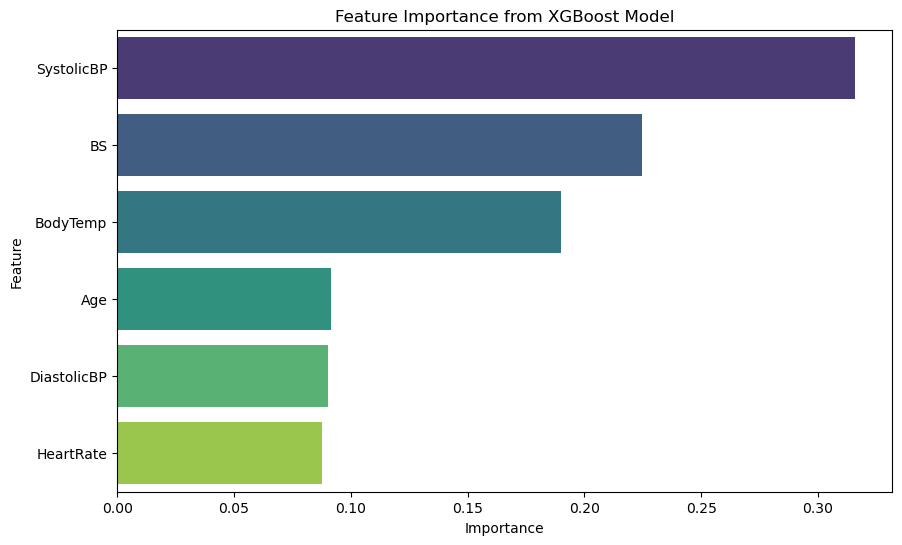

In [ ]:
# Feature importance from the XGBoost model
xgb_model = final_xgb_model.named_steps['classifier']
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**SystolicBP is the most important feature based on the XGBoost model's feature importance ranking.**

I believe we have successfully reached to a best model. Thank you.